# Predicting One Year Survival of Patients with Hepatocellular Carcinoma: A Logistic Regression Model

### <img src="liver_2.png" width="400">

## Outline
   - ### Background Information
   - ### Goal
   - ### Libraries to Import
   - ### Data Exploration/Data Wrangling
   - ### Pandas Profiling Package
   - ### Feature Selection
   - ### Model Buiding/Tuning
   - ### Conclusions




- ## Background Information


...

 - ## Goal

...

- ## Libraries to Import


In [ ]:
!pip install fancyimpute

In [ ]:
!pip install imblearn


In [47]:
import math
import random
import numpy as np
import pandas as pd
import seaborn as sns
import pandas_profiling
from scipy import stats
import statsmodels as sm
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import sklearn.preprocessing as preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import roc_curve, accuracy_score, roc_auc_score, classification_report, r2_score, make_scorer, roc_curve, auc
from sklearn.model_selection import cross_validate, train_test_split, cross_val_score, StratifiedKFold, KFold, cross_val_predict


%matplotlib inline

- ## Data Exploration/Data Wrangling


In [48]:
###preview data
raw_hcc_data=pd.read_csv("hcc_data.csv")
raw_hcc_data.head()

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,ALP,TP,Creatinine,Nodule,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
0,1,0,1,0,0,0,0,1,0,1,...,150,7.1,0.7,1,3.5,0.5,?,?,?,1
1,0,?,0,0,0,0,1,1,?,?,...,?,?,?,1,1.8,?,?,?,?,1
2,1,0,1,1,0,1,0,1,0,1,...,109,7,2.1,5,13,0.1,28,6,16,1
3,1,1,1,0,0,0,0,1,0,1,...,174,8.1,1.11,2,15.7,0.2,?,?,?,0
4,1,1,1,1,0,1,0,1,0,1,...,109,6.9,1.8,1,9,?,59,15,22,1


In [49]:
#examine dataset shape
raw_hcc_data.shape


(165, 50)

In [50]:
raw_hcc_data.describe()

,Gender,Alcohol,Cirrhosis,Age,PS,Class
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000
mean,0.806061,0.739394,0.903030,64.690909,1.018182,0.618182
std,0.396586,0.440302,0.296817,13.319534,1.181528,0.487311
min,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,57.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,66.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,74.000000,2.000000,1.000000
max,1.000000,1.000000,1.000000,93.000000,4.000000,1.000000


In [51]:
raw_hcc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 50 columns):
Gender            165 non-null int64
Symptoms          165 non-null object
Alcohol           165 non-null int64
HBsAg             165 non-null object
HBeAg             165 non-null object
HBcAb             165 non-null object
HCVAb             165 non-null object
Cirrhosis         165 non-null int64
Endemic           165 non-null object
Smoking           165 non-null object
Diabetes          165 non-null object
Obesity           165 non-null object
Hemochro          165 non-null object
AHT               165 non-null object
CRI               165 non-null object
HIV               165 non-null object
NASH              165 non-null object
Varices           165 non-null object
Spleno            165 non-null object
PHT               165 non-null object
PVT               165 non-null object
Metastasis        165 non-null object
Hallmark          165 non-null object
Age               165 no

In [52]:
raw_hcc_data.isna().mean().round(4)

Gender            0.0
Symptoms          0.0
Alcohol           0.0
HBsAg             0.0
HBeAg             0.0
HBcAb             0.0
HCVAb             0.0
Cirrhosis         0.0
Endemic           0.0
Smoking           0.0
Diabetes          0.0
Obesity           0.0
Hemochro          0.0
AHT               0.0
CRI               0.0
HIV               0.0
NASH              0.0
Varices           0.0
Spleno            0.0
PHT               0.0
PVT               0.0
Metastasis        0.0
Hallmark          0.0
Age               0.0
Grams_day         0.0
Packs_year        0.0
PS                0.0
Encephalopathy    0.0
Ascites           0.0
INR               0.0
AFP               0.0
Hemoglobin        0.0
MCV               0.0
Leucocytes        0.0
Platelets         0.0
Albumin           0.0
Total_Bil         0.0
ALT               0.0
AST               0.0
GGT               0.0
ALP               0.0
TP                0.0
Creatinine        0.0
Nodule            0.0
Major_Dim         0.0
Dir_Bil   

In [53]:
# replace all "?" in the dataset with 0
zeroed_hcc_data=raw_hcc_data.replace("?", 0)

In [54]:
zeroed_hcc_data.head()

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,ALP,TP,Creatinine,Nodule,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
0,1,0,1,0,0,0,0,1,0,1,...,150,7.1,0.7,1,3.5,0.5,0,0,0,1
1,0,0,0,0,0,0,1,1,0,0,...,0,0,0,1,1.8,0,0,0,0,1
2,1,0,1,1,0,1,0,1,0,1,...,109,7,2.1,5,13,0.1,28,6,16,1
3,1,1,1,0,0,0,0,1,0,1,...,174,8.1,1.11,2,15.7,0.2,0,0,0,0
4,1,1,1,1,0,1,0,1,0,1,...,109,6.9,1.8,1,9,0,59,15,22,1


In [55]:
zeroed_hcc_data.isnull().sum()

Gender            0
Symptoms          0
Alcohol           0
HBsAg             0
HBeAg             0
HBcAb             0
HCVAb             0
Cirrhosis         0
Endemic           0
Smoking           0
Diabetes          0
Obesity           0
Hemochro          0
AHT               0
CRI               0
HIV               0
NASH              0
Varices           0
Spleno            0
PHT               0
PVT               0
Metastasis        0
Hallmark          0
Age               0
Grams_day         0
Packs_year        0
PS                0
Encephalopathy    0
Ascites           0
INR               0
AFP               0
Hemoglobin        0
MCV               0
Leucocytes        0
Platelets         0
Albumin           0
Total_Bil         0
ALT               0
AST               0
GGT               0
ALP               0
TP                0
Creatinine        0
Nodule            0
Major_Dim         0
Dir_Bil           0
Iron              0
Sat               0
Ferritin          0
Class             0


In [56]:
#examine all features in dataset
zeroed_hcc_data.count()

Gender            165
Symptoms          165
Alcohol           165
HBsAg             165
HBeAg             165
HBcAb             165
HCVAb             165
Cirrhosis         165
Endemic           165
Smoking           165
Diabetes          165
Obesity           165
Hemochro          165
AHT               165
CRI               165
HIV               165
NASH              165
Varices           165
Spleno            165
PHT               165
PVT               165
Metastasis        165
Hallmark          165
Age               165
Grams_day         165
Packs_year        165
PS                165
Encephalopathy    165
Ascites           165
INR               165
AFP               165
Hemoglobin        165
MCV               165
Leucocytes        165
Platelets         165
Albumin           165
Total_Bil         165
ALT               165
AST               165
GGT               165
ALP               165
TP                165
Creatinine        165
Nodule            165
Major_Dim         165
Dir_Bil   

**Explore distribution of target: Alive or Dead at 1 Year =Mark**

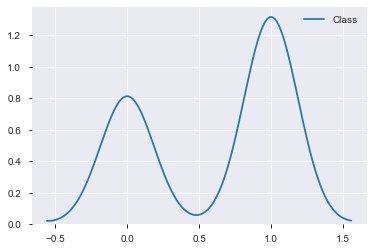

In [57]:
"""Note degree of class imbalance; 
Class Distribution: 2 classes: 63 patients labeled as “dies” (0) 102 patients labeled as “lives” (1)"""
sns.kdeplot(raw_hcc_data["Class"])


**Correlation matrix**

In [58]:
# Basic correlogram demonstrates minimal correlation among the dataset features
corr = raw_hcc_data.corr()
corr.style.background_gradient(cmap='coolwarm')

,Gender,Alcohol,Cirrhosis,Age,PS,Class
Gender,1,0.442103,0.253663,0.172121,0.04661,-0.0384348
Alcohol,0.442103,1,0.458652,0.162934,0.161536,-0.0403024
Cirrhosis,0.253663,0.458652,1,-0.0014582,0.0224449,0.0375573
Age,0.172121,0.162934,-0.0014582,1,0.152242,-0.146054
PS,0.04661,0.161536,0.0224449,0.152242,1,-0.379708
Class,-0.0384348,-0.0403024,0.0375573,-0.146054,-0.379708,1


**Summmary of 49 features:**

Gender                       (1=Male;0=Female)	

Symptoms                     (1=Yes;0=No)

Alcohol	                     (1=Yes;0=No)

Hepatitis B Surface Antigen	 (1=Yes;0=No)

Hepatitis B e Antigen        (1=Yes;0=No)

Hepatitis B Core Antibody    (1=Yes;0=No)

Hepatitis C Virus Antibody	 (1=Yes;0=No)

Cirrhosis                    (1=Yes;0=No)

Endemic Countries	         (1=Yes;0=No)

Smoking                      (1=Yes;0=No)

Diabetes	                 (1=Yes;0=No)

Obesity                      (1=Yes;0=No)

Hemochromatosis              (1=Yes;0=No)

Arterial Hypertension        (1=Yes;0=No)

Chronic Renal Insufficiency	 (1=Yes;0=No)

Human Immunodeficiency Virus (1=Yes;0=No)

Nonalcoholic Steatohepatitis	(1=Yes;0=No)

Esophageal Varices				(1=Yes;0=No)

Splenomegaly					(1=Yes;0=No)

Portal Hypertension			    (1=Yes;0=No)	

Portal Vein Thrombosis			(1=Yes;0=No)	

Liver Metastasis				(1=Yes;0=No)	

Radiological Hallmark			(1=Yes;0=No)	

Age at diagnosis				20-93				

Grams of Alcohol per day		Grams/day	

Packs of cigarets per year		Packs/year		

Performance Status*			    [0,1,2,3,4,5]	

Encephalopathy degree*			[1,2,3]			

Ascites degree*				    [1,2,3]			

International Normalised Ratio*	0.84-4.82		

Alpha-Fetoprotein (ng/mL)		AFP			

Haemoglobin (g/dL)				

Mean Corpuscular Volume	 (fl)	MCV

Leukocytes(G/L)					

Platelets	(G/L)				

Albumin (mg/dL)				

Total Bilirubin(mg/dL)			

Alanine transaminase (U/L)		ALT

Aspartate transaminase (U/L)	AST				

Gamma glutamyl transferase (U/L)GGT			

Alkaline phosphatase (U/L)		ALP				

Total Proteins (g/dL)			TP				

Creatinine (mg/dL)				

Number of Nodules				0-5			

Major dimension of nodule (cm)	

Direct Bilirubin (mg/dL)		

Iron	(mcg/dL)					

Oxygen Saturation (%)			

Ferritin (ng/mL)				

Class Attribute	


### Pandas Profiling Package


In [ ]:
raw_hcc_data.profile_report(style={'full_width':True})

- ## Feature Selection/Engineering
   

A majority of the datasets missing values come from the lab values of Iron(mcg/dL), Oxygen Saturation, and Ferritin (ng/mL).  These values are important for liver disease secondary to hemachromatosis.  Since there is a feature indicating whether a patient has hemochromatosis or not, these 3 features will be dropped.

In [41]:
# raw_hcc_data=raw_hcc_data.drop(['Sat', "Iron", "Ferritin"], axis=1)



In [13]:
raw_hcc_data.head()
raw_hcc_data.columns

Index(['Gender', 'Symptoms', 'Alcohol', 'HBsAg', 'HBeAg', 'HBcAb', 'HCVAb',
       'Cirrhosis', 'Endemic', 'Smoking', 'Diabetes', 'Obesity', 'Hemochro',
       'AHT', 'CRI', 'HIV', 'NASH', 'Varices', 'Spleno', 'PHT', 'PVT',
       'Metastasis', 'Hallmark', 'Age', 'Grams_day', 'Packs_year', 'PS',
       'Encephalopathy', 'Ascites', 'INR', 'AFP', 'Hemoglobin', 'MCV',
       'Leucocytes', 'Platelets', 'Albumin', 'Total_Bil', 'ALT', 'AST', 'GGT',
       'ALP', 'TP', 'Creatinine', 'Nodule', 'Major_Dim', 'Dir_Bil', 'Iron',
       'Sat', 'Ferritin', 'Class'],
      dtype='object')

### Creating MELD Score Feature
Created a MELD score for each patient in the dataset; MELD scores are use to predict 3 month mortality rates in patients with end-stage liver disease.  It stratifies severity of end-stage liver disease for transplant planning

MELD = [ 0.378 * loge(bilirubin)) + (1.120*loge(INR)) + (0.957*loge(creatinine)) + 0.643 ] * 10

The addition of the MELD score feature increased model accuracy by 2% (from 76% to 78%)
(see MELD score section under model tuning for detailed code)

<img src="meld_score.png" width="800">

###  Creating Fibrosis-4 (FIB-4) Index for Liver Fibrosis Feature

Created a FIB-4 Index score for each patient.  It is a noninvasive estimate of liver scarring in HCV and HBV patients. (see Fibrosis-4 Index score section under model tuning for detailed code)

<img src="fib_4_index.png" width="400">

### Creating NAFLD Score Feature

### Creating BCLC Score Feature

- ## Model Buiding/Tuning

### Base Model
Running a base logistic model in which Null values have been replaced with 0's and no additional model tuning or parameter optimization has occurred.

In [14]:
X_zero = zeroed_hcc_data[zeroed_hcc_data.columns[:-1]]
y_zero = zeroed_hcc_data.Class


In [15]:
std_scaler = StandardScaler() #StandardScaler() # RobustScaler
X_scaled_zero= std_scaler.fit_transform(X_zero)

In [16]:
# Split the data into a training set and a test set
X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(X_scaled_zero, y_zero, random_state=0)

logreg = LogisticRegression(fit_intercept = False, C = 1e12)
model_log = logreg.fit(X_train_0, y_train_0)
model_log

##run model with test data
y_hat_test_0 = logreg.predict(X_test_0)
y_hat_train_0 = logreg.predict(X_train_0)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [17]:
residuals = y_train_0 - y_hat_train_0
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

0    123
Name: Class, dtype: int64
0    1.0
Name: Class, dtype: float64


In [18]:
residuals = y_test_0 - y_hat_test_0
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

 0    28
 1     9
-1     5
Name: Class, dtype: int64
 0    0.666667
 1    0.214286
-1    0.119048
Name: Class, dtype: float64


In [19]:
print('Training Precision: ', precision_score(y_hat_train_0, y_train_0))
print('Testing Precision: ', precision_score(y_hat_test_0, y_test_0))
print('\n\n')

print('Training Recall: ', recall_score(y_hat_train_0, y_train_0))
print('Testing Recall: ', recall_score(y_hat_test_0, y_test_0))
print('\n\n')

print('Training Accuracy: ', accuracy_score(y_hat_train_0, y_train_0))
print('Testing Accuracy: ', accuracy_score(y_hat_test_0, y_test_0))
print('\n\n')

print('Training F1-Score: ',f1_score(y_hat_train_0,y_train_0))
print('Testing F1-Score: ',f1_score(y_hat_test_0,y_test_0))

Training Precision:  1.0
Testing Precision:  0.6086956521739131



Training Recall:  1.0
Testing Recall:  0.7368421052631579



Training Accuracy:  1.0
Testing Accuracy:  0.6666666666666666



Training F1-Score:  1.0
Testing F1-Score:  0.6666666666666666


### Tuning Model

- ### **Utilizing KNN imputed data for missing values**

-Nan's in dataset will be replaced with imputed data via KNN (K nearest neighbors) model; thereby preserving the "patient profile" and providing a more accurate result as oppose to simply filling in null values with means or averages.  

In [59]:
# replace all "?" in the dataset with Nan to prepare for KNN model
hcc_data=raw_hcc_data.replace("?", np.nan)
hcc_data.head()

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,ALP,TP,Creatinine,Nodule,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
0,1,0,1,0,0,0,0,1,0,1,...,150,7.1,0.7,1,3.5,0.5,NaN,NaN,NaN,1
1,0,NaN,0,0,0,0,1,1,NaN,NaN,...,NaN,NaN,NaN,1,1.8,NaN,NaN,NaN,NaN,1
2,1,0,1,1,0,1,0,1,0,1,...,109,7,2.1,5,13,0.1,28,6,16,1
3,1,1,1,0,0,0,0,1,0,1,...,174,8.1,1.11,2,15.7,0.2,NaN,NaN,NaN,0
4,1,1,1,1,0,1,0,1,0,1,...,109,6.9,1.8,1,9,NaN,59,15,22,1


In [60]:
###run KNN model using fancyimpute package
from fancyimpute import KNN

# Use 3 nearest rows which have a feature to fill in each row's missing features
# it returns a np.array which I store as a pandas dataframe
hcc_data_filled = pd.DataFrame(KNN(3).fit_transform(hcc_data))


Imputing row 1/165 with 4 missing, elapsed time: 0.020
Imputing row 101/165 with 6 missing, elapsed time: 0.032


In [61]:
##the column categories were removed when imputed into model, reinsert column headings
hcc_data_filled.columns = hcc_data.columns
hcc_data_filled.index = hcc_data.index

In [62]:
##All Nan's have been replaced with numerical values determined by KNN model
hcc_data_filled.head()

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,ALP,TP,Creatinine,Nodule,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
0,1.0,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.000000,...,150.000000,7.100000,0.700000,1.0,3.5,0.500000,172.624798,77.968171,679.966715,1.0
1,0.0,0.341166,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.343383,...,115.692145,7.501206,0.789035,1.0,1.8,0.647632,151.732189,54.933189,691.592421,1.0
2,1.0,0.000000,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.000000,...,109.000000,7.000000,2.100000,5.0,13.0,0.100000,28.000000,6.000000,16.000000,1.0
3,1.0,1.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.000000,...,174.000000,8.100000,1.110000,2.0,15.7,0.200000,72.394533,26.111762,385.207036,0.0
4,1.0,1.000000,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.000000,...,109.000000,6.900000,1.800000,1.0,9.0,0.357331,59.000000,15.000000,22.000000,1.0


- ### **Creating MELD score feature**

In [63]:
### Created a function to compute patient MELD scores and subsequently added a new column to hold these new values
def fxyz(x, y, z):  ##MELD score formula uses Total Bili, INR, and Creatinine
    return (((np.log(x)*0.378) + (np.log(y)*1.120)  + (np.log(z)*0.957)+0.643)*10)

hcc_data_filled['meld_score'] = hcc_data_filled.apply(lambda x: fxyz(x['Total_Bil'], x['INR'], x['Creatinine']), axis=1)
hcc_data_filled.tail()

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,TP,Creatinine,Nodule,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class,meld_score
160,0.0,0.0,1.0,0.000000,0.0,0.000000,1.000000,1.0,0.0,1.0,...,7.6,0.70,5.0,3.0,0.335016,101.403671,49.040665,604.277108,1.0,-1.556233
161,0.0,1.0,0.0,0.000106,0.0,0.000106,0.927229,1.0,0.0,0.0,...,6.7,0.70,1.0,2.2,2.300000,82.599618,25.974998,194.442225,0.0,11.052555
162,1.0,0.0,1.0,0.000000,0.0,0.000000,0.000000,1.0,0.0,1.0,...,7.5,1.46,5.0,18.6,19.819333,24.268491,9.578649,473.166684,1.0,9.489553
163,1.0,0.0,1.0,1.000000,0.0,1.000000,1.000000,1.0,1.0,1.0,...,8.4,0.74,5.0,18.0,1.082581,53.267156,22.226264,388.430047,0.0,12.429722
164,1.0,1.0,1.0,0.000000,0.0,0.000000,1.000000,1.0,0.0,1.0,...,6.6,3.95,5.0,8.5,19.800000,27.790599,6.769031,163.570573,0.0,38.759910


- ### Creating Fibrosis-4 (FIB-4) Index for Liver Fibrosis Feature

In [64]:
### Created a function to compute patient FIB-4 scores and subsequently added a new column to hold these new values
def fibxyz(w, x, y, z):  ##Fib-4 score formula uses age, AST(Aspartate transaminase), Plt (platelet), ALT (Alanine transaminase)
    return (w*x)/(y*math.sqrt(z))

hcc_data_filled['fib_score'] = hcc_data_filled.apply(lambda x: fibxyz(x['Age'], x['AST'], x['Platelets'], x['ALT']), axis=1)
hcc_data_filled.tail()

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,...,Creatinine,Nodule,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class,meld_score,fib_score
160,0.0,0.0,1.0,0.000000,0.0,0.000000,1.000000,1.0,0.0,1.0,...,0.70,5.0,3.0,0.335016,101.403671,49.040665,604.277108,1.0,-1.556233,0.001470
161,0.0,1.0,0.0,0.000106,0.0,0.000106,0.927229,1.0,0.0,0.0,...,0.70,1.0,2.2,2.300000,82.599618,25.974998,194.442225,0.0,11.052555,6.206492
162,1.0,0.0,1.0,0.000000,0.0,0.000000,0.000000,1.0,0.0,1.0,...,1.46,5.0,18.6,19.819333,24.268491,9.578649,473.166684,1.0,9.489553,0.001206
163,1.0,0.0,1.0,1.000000,0.0,1.000000,1.000000,1.0,1.0,1.0,...,0.74,5.0,18.0,1.082581,53.267156,22.226264,388.430047,0.0,12.429722,0.003164
164,1.0,1.0,1.0,0.000000,0.0,0.000000,1.000000,1.0,0.0,1.0,...,3.95,5.0,8.5,19.800000,27.790599,6.769031,163.570573,0.0,38.759910,0.001815


- ### Creating BCLC Score Feature

- ### Class balancing via SMOTE (Synthetic Minority Over-sampling Technique)
prior to SMOTE technique, X_train had 115 patient records, after SMOTE, X_train_res had 146 patient records

In [65]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X= hcc_data_filled.drop(["Class"], axis=1)
y = hcc_data_filled.Class


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (115, 51)
Number transactions y_train dataset:  (115,)
Number transactions X_test dataset:  (50, 51)
Number transactions y_test dataset:  (50,)


In [66]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 73
Before OverSampling, counts of label '0': 42 

After OverSampling, the shape of train_X: (146, 51)
After OverSampling, the shape of train_y: (146,) 

After OverSampling, counts of label '1': 73
After OverSampling, counts of label '0': 73


- ### Grid Search

Final model modifications: a grid search to optimize parameters and assign most appropriate penalty weight



In [67]:
sc = StandardScaler()
X_train_res = sc.fit_transform(X_train_res)
X_test = sc.transform(X_test)

In [68]:
np.linspace(0.2, 10, 10)

array([ 0.2       ,  1.28888889,  2.37777778,  3.46666667,  4.55555556,
        5.64444444,  6.73333333,  7.82222222,  8.91111111, 10.        ])

In [69]:
np.random.seed(10)

parameters = {
    'C': np.linspace(0.1, 20, 500)
             }
lr = LogisticRegression()
clf = GridSearchCV(lr, parameters, cv=5, verbose=5, n_jobs=5)
clf.fit(X_train_res, y_train_res.ravel())

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    2.7s
[Parallel(n_jobs=5)]: Done 170 tasks      | elapsed:    4.3s
[Parallel(n_jobs=5)]: Done 890 tasks      | elapsed:    9.2s
[Parallel(n_jobs=5)]: Done 1898 tasks      | elapsed:   17.5s
[Parallel(n_jobs=5)]: Done 2500 out of 2500 | elapsed:   22.1s finished
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=5,
             param_grid={'C': array([ 0.1       ,  0.139879...
       19.04288577, 19.08276553, 19.12264529, 19.16252505, 19.20240481,
       19.24228457, 19.28216433, 19.32204409, 19.36192385, 19.40180361,
       19.44168337, 19.48156313, 19.52144289, 19.56132265, 19.6012024 ,
       19.64108216, 19.68096192, 19.72084168, 19.76072144, 19.80060

In [72]:
clf.best_params_

{'C': 0.3791583166332665}

- ### Final Logistic Model 


Note: Data was already split into a training set and a test set when performing SMOTE technique 

In [151]:

logreg = LogisticRegression(C=0.000000001, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.01, verbose=0,
                                          warm_start=False)
model_log = logreg.fit(X_train_res, y_train_res)
model_log

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1e-09, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.01, verbose=0,
                   warm_start=False)

In [152]:
##run model with test data
y_hat_test = logreg.predict(X_test)
y_hat_train = logreg.predict(X_train_res)

In [153]:
residuals = y_train_res - y_hat_train
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

 0.0    115
 1.0     16
-1.0     15
dtype: int64
 0.0    0.787671
 1.0    0.109589
-1.0    0.102740
dtype: float64


In [154]:
residuals = y_test - y_hat_test
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

 0.0    38
 1.0     8
-1.0     4
Name: Class, dtype: int64
 0.0    0.76
 1.0    0.16
-1.0    0.08
Name: Class, dtype: float64


In [155]:
print('Training Precision: ', precision_score(y_hat_train, y_train_res))
print('Testing Precision: ', precision_score(y_hat_test, y_test))
print('\n\n')

print('Training Recall: ', recall_score(y_hat_train, y_train_res))
print('Testing Recall: ', recall_score(y_hat_test, y_test))
print('\n\n')

print('Training Accuracy: ', accuracy_score(y_hat_train, y_train_res))
print('Testing Accuracy: ', accuracy_score(y_hat_test, y_test))
print('\n\n')

print('Training F1-Score: ',f1_score(y_hat_train,y_train_res))
print('Testing F1-Score: ',f1_score(y_hat_test,y_test))

Training Precision:  0.7808219178082192
Testing Precision:  0.7241379310344828



Training Recall:  0.7916666666666666
Testing Recall:  0.84



Training Accuracy:  0.7876712328767124
Testing Accuracy:  0.76



Training F1-Score:  0.7862068965517242
Testing F1-Score:  0.7777777777777777


In [156]:
acc = accuracy_score(y_test,y_hat_test) * 100
print("Accuracy is :{0}".format(acc))

Accuracy is :76.0


            prediction                        
               0       1                         
             -----   -----                      
          0 | TN   |  FP               
    actual   -----   -----             
          1 | FN   |  TP   

In [160]:
## confusion matrix
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, y_hat_test, rownames=['True'], colnames=['Predicted'], margins=True)


Confusion Matrix
----------------


Predicted,0.0,1.0,All
True,,,
0.0,17,4,21
1.0,8,21,29
All,25,25,50


In [169]:
# Your code here
from sklearn.metrics import roc_curve, auc

#for various decision boundaries given the case member probabilites

#First calculate the probability scores of each of the datapoints:
y_score = model_log.decision_function(X_test)
   
fpr, tpr, thresholds = roc_curve(y_test, y_score)

y_train_score = model_log.decision_function(X_train_res)
train_fpr, train_tpr, thresholds = roc_curve(y_train_res, y_train_score)

AUC: 0.7931034482758622


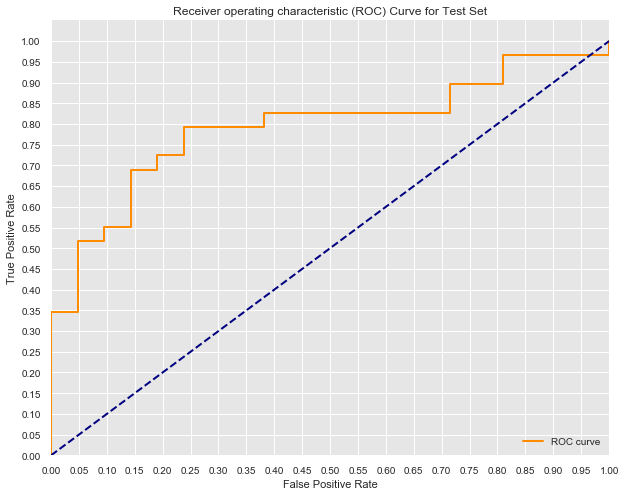

In [170]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Seaborns Beautiful Styling
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Test Set')
plt.legend(loc="lower right")
print('AUC: {}'.format(auc(fpr, tpr)))
plt.show()

- ## Conclusions